# Calculo y diseño Circuito Sintonizador

Datos:
- Fo : 13 Mhz
- Bw : 1.3 Mhz
- Zgen: 50ohm
- ZL: 1000ohm

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

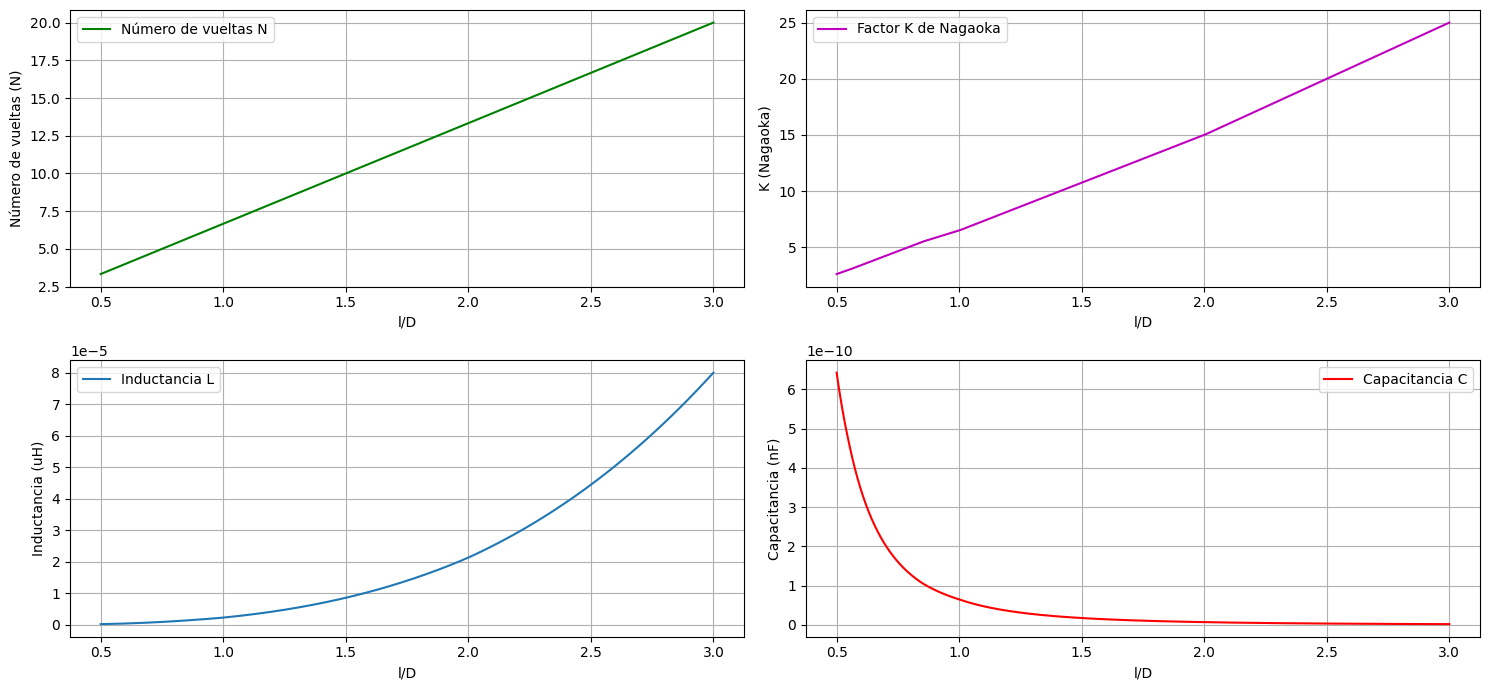

             l/D          K          N        L (uH)        C (nF)
0       0.500000   2.625000   3.333333  2.333333e-07  6.423575e-10
1       0.500017   2.625125   3.333444  2.333600e-07  6.422841e-10
2       0.500033   2.625250   3.333556  2.333867e-07  6.422107e-10
3       0.500050   2.625375   3.333667  2.334133e-07  6.421373e-10
4       0.500067   2.625500   3.333778  2.334400e-07  6.420639e-10
...          ...        ...        ...           ...           ...
149995  2.999933  24.999333  19.999556  7.999431e-05  1.873676e-12
149996  2.999950  24.999500  19.999667  7.999573e-05  1.873643e-12
149997  2.999967  24.999667  19.999778  7.999716e-05  1.873609e-12
149998  2.999983  24.999833  19.999889  7.999858e-05  1.873576e-12
149999  3.000000  25.000000  20.000000  8.000000e-05  1.873543e-12

[150000 rows x 5 columns]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros
fo = 13e6  # Frecuencia central en Hz
BW = 1.3e6  # Ancho de banda en Hz
Rgen = 50   # Impedancia del generador en ohmios
RL = 1e3    # Carga en ohmios
Qc= fo/BW   #Qc (cargado)

d = 0.0015  # Diámetro del conductor en metros
d1=0.0018   # Diámetro del conductor en metros

D = 0.02    # Diámetro del inductor en metros 
D1= 0.015    # Diámetro del inductor en metros

p = 0.003   #paso entre espiras

# Definir rango de valores para l/D

lD_values = np.linspace(0.5, 3.0, 150000)

# Interpolación de K usando tabla de Nagaoka
nagaoka_table = pd.DataFrame({
    "lD": [0.35, 0.55, 0.85, 1.0, 2.0, 3.0,4.0,5.5],
    "K":  [1.5, 3, 5.5, 6.5, 15, 25,35,50] # corregido
})
K_values = np.interp(lD_values, nagaoka_table["lD"], nagaoka_table["K"])

# Calcular número de espiras por unidad de longitud (Ns)


Ns_values = 1 / p  # Número de vueltas por metro


# Calcular número total de espiras
N_values = Ns_values * (lD_values * D)

# Calcular inductancia L = K * N^2 * D^3
L_values = K_values * N_values**2 * D**3 * 1e-3  

# Calcular capacitancia C = 1 / ( (2*pi*fo)^2 * L ) 
C_values = (1/(2*np.pi*fo*np.sqrt(L_values)))**2

# Crear DataFrame
inductor_df = pd.DataFrame({
    "l/D": lD_values,
    "K": K_values,
    "N": N_values,
    "L (uH)": L_values,
    "C (nF)": C_values
})



# Graficar
plt.figure(figsize=(15, 7))

# Gráfico 1: l/D vs Número de vueltas N
plt.subplot(2, 2, 1)
plt.plot(inductor_df["l/D"], inductor_df["N"], label="Número de vueltas N", color='g')
plt.xlabel("l/D")
plt.ylabel("Número de vueltas (N)")
plt.legend()
plt.grid()

# Gráfico 2: l/D vs K (Curva de Nagaoka)
plt.subplot(2, 2, 2)
plt.plot(inductor_df["l/D"], inductor_df["K"], label="Factor K de Nagaoka", color='m')
plt.xlabel("l/D")
plt.ylabel("K (Nagaoka)")
plt.legend()
plt.grid()

# Gráfico 3: l/D vs Inductancia L
plt.subplot(2, 2, 3)
plt.plot(inductor_df["l/D"], inductor_df["L (uH)"], label="Inductancia L")
plt.xlabel("l/D")
plt.ylabel("Inductancia (uH)")
plt.legend()
plt.grid()

# Gráfico 4: l/D vs Capacitancia C
plt.subplot(2, 2, 4)
plt.plot(inductor_df["l/D"], inductor_df["C (nF)"], label="Capacitancia C", color='r')
plt.xlabel("l/D")
plt.ylabel("Capacitancia (nF)")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

# Mostrar tabla con los primeros valores
print(inductor_df)


Ecuación interpolada:
-0.0843843577766591*x**3 + 0.991391705603495*x**2 + 6.32651089125578*x - 0.744240230701375


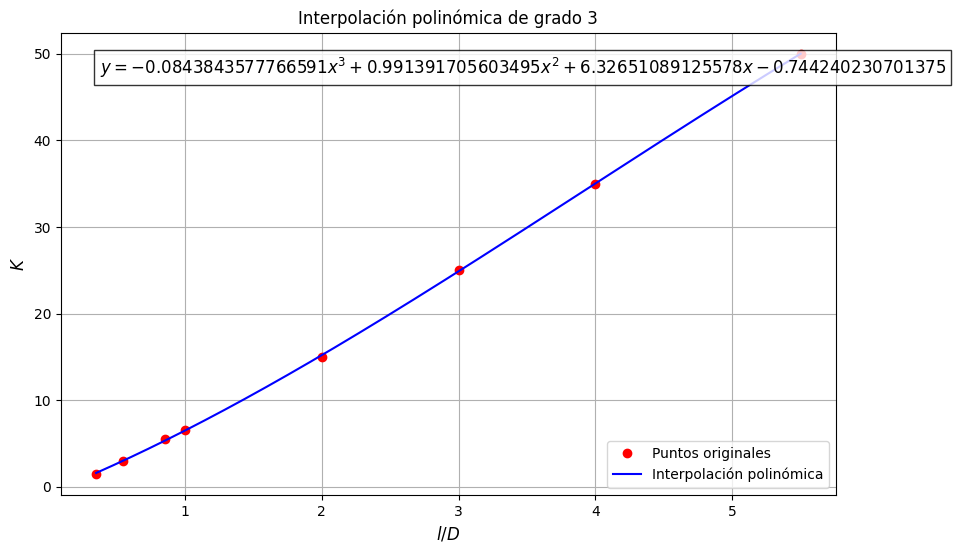

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Datos de entrada
x = np.array([0.35, 0.55, 0.85, 1.0, 2.0, 3.0,4.0,5.5])
y = np.array([1.5, 3, 5.5, 6.5, 15, 25,35,50])

# Ajuste polinómico de grado 3
coeffs = np.polyfit(x, y, 3)
polynomial = np.poly1d(coeffs)

# Generar valores para la curva
x_plot = np.linspace(min(x), max(x), 1000)
y_plot = polynomial(x_plot)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Puntos originales')  # Puntos de datos
plt.plot(x_plot, y_plot, 'b-', label='Interpolación polinómica')  # Curva interpolada
plt.xlabel(r'$l/D$', fontsize=12)
plt.ylabel(r'$K$', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True)
plt.title('Interpolación polinómica de grado 3')

# Crear la ecuación simbólica
x_symbol = sp.Symbol('x')
polynomial_sympy = sum(coeffs[i] * x_symbol**(len(coeffs)-1-i) for i in range(len(coeffs)))

# Mostrar ecuación en la gráfica
eq_text = sp.latex(polynomial_sympy)  # Convertir a formato LaTeX
plt.text(0.05, 0.95, f"$y = {eq_text}$", transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Mostrar ecuación en la consola
print("Ecuación interpolada:")
print(sp.expand(polynomial_sympy))  

plt.show()


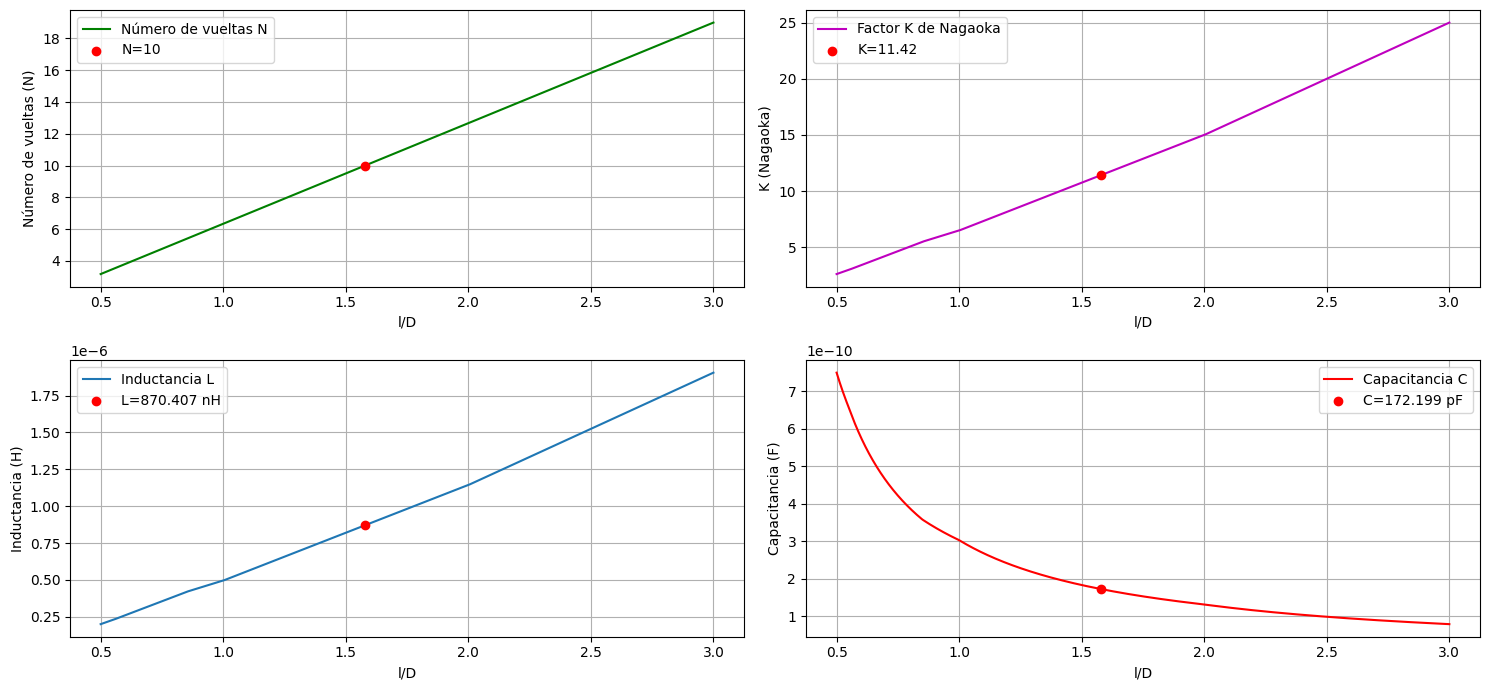

        l/D         K         N       L (H)       C (F)
0  0.500000  2.625000  3.166667  200.054 nH  749.214 pF
1  0.500017  2.625125  3.166772  200.064 nH  749.178 pF
2  0.500033  2.625250  3.166878  200.073 nH  749.143 pF
3  0.500050  2.625375  3.166983  200.083 nH  749.107 pF
4  0.500067  2.625500  3.167089  200.092 nH  749.071 pF


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# Definir parámetros del circuito
fo = 13e6  # Frecuencia central en Hz
BW = 1.3e6  # Ancho de banda en Hz
Rgen = 50   # Impedancia del generador en ohmios
RL = 1e3    # Carga en ohmios
Qc= fo/BW   #Qc (cargado)

#Parametros de la bobina


d = 0.0015  # Diámetro del conductor en metros
d1=0.0018   # Diámetro del conductor en metros

D = 0.019    # Diámetro del inductor en metros 
D1= 0.015    # Diámetro del inductor en metros

D_cm = D*100
d_cm = d*100



p_cm = 2*d_cm  #paso entre espiras


# Definir rango de valores para l/D
lD_values = np.linspace(0.5, 3.0, 150000)

# Interpolación de K usando tabla de Nagaoka
nagaoka_table = pd.DataFrame({
    "lD": [0.35, 0.55, 0.85, 1.0, 2.0, 3.0, 4.0, 5.5],
    "K":  [1.5, 3, 5.5, 6.5, 15, 25, 35, 50] 
})

K_values = np.interp(lD_values, nagaoka_table["lD"], nagaoka_table["K"])

# Calcular número de espiras por unidad de longitud (Ns)

# Ns = N/l = 1/p = 1/(Se+d) pag10pdf
  
Ns_values = (1/(p_cm))  # Relacion espiras por longitud (p en cm)

# Calcular número total de espiras
N_values = Ns_values * (lD_values * D_cm)

# Calcular inductancia L = K * N^2 * D^3
L_values = K_values * (Ns_values**2) * (D**3) * (1e-3)

# Calcular capacitancia C = 1 / ( (2*pi*fo)^2 * L ) 

#C_values = (1 / ( (2*np.pi*fo)**2 * (L_values))) 
C_values = (1/(2*np.pi*fo*np.sqrt(L_values)))**2


# Crear DataFrame
inductor_df = pd.DataFrame({
    "l/D": lD_values,
    "K": K_values,
    "N": N_values,
    "L (H)": L_values,
    "C (F)": C_values
})

# Elegir el valor donde N = 10
N_target = 10
idx_target = (np.abs(N_values - N_target)).argmin()
lD_target = lD_values[idx_target]
K_target = K_values[idx_target]
L_target = L_values[idx_target]
C_target = C_values[idx_target]


# Crear objetos EngFormatter para las unidades
formatter_H = EngFormatter(unit='H')  # Para la inductancia en henrios
formatter_F = EngFormatter(unit='F')  # Para la capacitancia en faradios

# Graficar
plt.figure(figsize=(15, 7))

# Gráfico 1: l/D vs Número de vueltas N
plt.subplot(2, 2, 1)
plt.plot(inductor_df["l/D"], inductor_df["N"], label="Número de vueltas N", color='g')
plt.scatter(lD_target, N_target, color='r', zorder=3, label=f'N={N_target}')
plt.xlabel("l/D")
plt.ylabel("Número de vueltas (N)")
plt.legend()
plt.grid()

# Gráfico 2: l/D vs K (Curva de Nagaoka)
plt.subplot(2, 2, 2)
plt.plot(inductor_df["l/D"], inductor_df["K"], label="Factor K de Nagaoka", color='m')
plt.scatter(lD_target, K_target, color='r', zorder=3, label=f'K={K_target:.2f}')
plt.xlabel("l/D")
plt.ylabel("K (Nagaoka)")
plt.legend()
plt.grid()

# Gráfico 3: l/D vs Inductancia L
plt.subplot(2, 2, 3)
plt.plot(inductor_df["l/D"], inductor_df["L (H)"], label="Inductancia L")
plt.scatter(lD_target, L_target, color='r', zorder=3, label=f'L={formatter_H.format_eng(L_target)}')
plt.xlabel("l/D")
plt.ylabel("Inductancia (H)")
plt.legend()
plt.grid()

# Gráfico 4: l/D vs Capacitancia C
plt.subplot(2, 2, 4)
plt.plot(inductor_df["l/D"], inductor_df["C (F)"], label="Capacitancia C", color='r')
plt.scatter(lD_target, C_target, color='r', zorder=3, label=f'C={formatter_F.format_eng(C_target)}')
plt.xlabel("l/D")
plt.ylabel("Capacitancia (F)")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

# Mostrar tabla con los primeros valores formateados
inductor_df["L (H)"] = inductor_df["L (H)"].apply(lambda x: formatter_H.format_eng(x))
inductor_df["C (F)"] = inductor_df["C (F)"].apply(lambda x: formatter_F.format_eng(x))
print(inductor_df.head())


## Calculos Rp, Rt, Rgen',Rl'

In [11]:
import numpy as np

#Definiendo los valores de inductancia y capacitancia para el inductor de 12 vueltas
L= L_target
C= C_target


#L= 0.78e-6
#C= 191e-12


print("L= ", L)
print("C= ", C)


#Caluclo Frecuencia de resonancia
Xl= 2*np.pi*fo*L
print("Xl= ", Xl)

#Calculo RT
Rt=Xl*Qc
print("Rt= ", Rt)


#Calculo Qd (Formula apunte)

f_Mhz=13
D=1.9 #en cm
p= 3 #en mm

Qd= (1080*D*p*np.sqrt(f_Mhz))/(D+20*p)
print("Qd= ", Qd)
print('D= ', D)

#Calculo de la resistencia de perdidas
Rp= Qd*Xl
print("Rp= ", Rp)

#Calculo de la resistencias Reflejadas - Criterio adaptacion a la entrada

#Rgen'
Rgenp= 2*Rt
print("Rgenp= ", Rgenp)


#RL'
# Rgen'= 2*Rt = (RLp*Rp)/(RLp+Rp)
RLp= ((2*Rt)*Rp)/(Rp-2*Rt)
print("RLp= ", RLp)




L=  8.704066788037847e-07
C=  1.7219928500655e-10
Xl=  71.09604392190198
Rt=  710.9604392190198
Qd=  358.5746955049486
D=  1.9
Rp=  25493.242300902453
Rgenp=  1421.9208784380396
RLp=  1505.915394113075


# Calculo de capacitores

In [12]:
import sympy as sp
from si_prefix import si_format

# Definir símbolos
RLp_sym = sp.Symbol('RLp')
Rgenp_sym = sp.Symbol('Rgenp')
Rgen_sym = sp.Symbol('Ra')
RL_sym = sp.Symbol('RL')
Ct_sym = sp.Symbol('Ct')
C1_sym = sp.Symbol('C1')
C2_sym = sp.Symbol('C2')
C3_sym = sp.Symbol('C3')
C4_sym = sp.Symbol('C4')

# Definir ecuaciones
eq1 = sp.Eq(Rgenp_sym,Rgen_sym*((1+(C1_sym/C2_sym))**2))
eq2 = sp.Eq(RLp_sym,RL_sym*((1+(C3_sym/C4_sym))**2))
eq3 = sp.Eq((Ct_sym/2),(C1_sym*C2_sym)/(C1_sym+C2_sym))
eq4 = sp.Eq((Ct_sym/2),(C3_sym*C4_sym)/(C3_sym+C4_sym))

# Resolver sistema de ecuaciones para los valores de c1,c2,c3 y c4
sol = sp.solve([eq1,eq2,eq3,eq4],(C1_sym,C2_sym,C3_sym,C4_sym))

# Mostrar solución
print("Solución:")
print(sol)

# Sustituir valores numéricos (ajusta según tu caso)
valores = {Rgen: 50, Rgenp: 1372.24, RL: 1000, RLp: 21381.70, C: 174e-12}
# Evaluar soluciones
soluciones = [
    (-C*sp.sqrt(Rgen*Rgenp)/(2*Rgen), C*(-Rgenp + sp.sqrt(Rgen*Rgenp))/(2*(Rgen - Rgenp)), 
     -C*sp.sqrt(RL*RLp)/(2*RL), C*(-RLp + sp.sqrt(RL*RLp))/(2*(RL - RLp))),
    
    (-C*sp.sqrt(Rgen*Rgenp)/(2*Rgen), C*(-Rgenp + sp.sqrt(Rgen*Rgenp))/(2*(Rgen - Rgenp)), 
     C*sp.sqrt(RL*RLp)/(2*RL), -C*(RLp + sp.sqrt(RL*RLp))/(2*RL - 2*RLp)),
    
    (C*sp.sqrt(Rgen*Rgenp)/(2*Rgen), -C*(Rgenp + sp.sqrt(Rgen*Rgenp))/(2*Rgen - 2*Rgenp), 
     -C*sp.sqrt(RL*RLp)/(2*RL), C*(-RLp + sp.sqrt(RL*RLp))/(2*(RL - RLp))),
    
    (C*sp.sqrt(Rgen*Rgenp)/(2*Rgen), -C*(Rgenp + sp.sqrt(Rgen*Rgenp))/(2*Rgen - 2*Rgenp), 
     C*sp.sqrt(RL*RLp)/(2*RL), -C*(RLp + sp.sqrt(RL*RLp))/(2*RL - 2*RLp))
]

# Filtrar soluciones con solo valores positivos
soluciones_validas = [sol for sol in soluciones if all(val > 0 for val in sol)]

# Función para imprimir en notación de ingeniería
def imprimir_con_prefijo(nombre, valor):
    valor_float = valor.evalf()
    print(f"{nombre} = {si_format(valor_float, precision=3)}F")

# Mostrar la primera solución válida
if soluciones_validas:
    print("Solución válida encontrada:")
    C1_val, C2_val, C3_val, C4_val = soluciones_validas[0]  # Tomamos la primera válida
    imprimir_con_prefijo("C1", C1_val)
    imprimir_con_prefijo("C2", C2_val)
    imprimir_con_prefijo("C3", C3_val)
    imprimir_con_prefijo("C4", C4_val)
else:
    print("No se encontraron soluciones con todos los valores positivos.")

Solución:
[(-Ct*sqrt(Ra*Rgenp)/(2*Ra), Ct*(-Rgenp + sqrt(Ra*Rgenp))/(2*(Ra - Rgenp)), -Ct*sqrt(RL*RLp)/(2*RL), Ct*(-RLp + sqrt(RL*RLp))/(2*(RL - RLp))), (-Ct*sqrt(Ra*Rgenp)/(2*Ra), Ct*(-Rgenp + sqrt(Ra*Rgenp))/(2*(Ra - Rgenp)), Ct*sqrt(RL*RLp)/(2*RL), -Ct*(RLp + sqrt(RL*RLp))/(2*RL - 2*RLp)), (Ct*sqrt(Ra*Rgenp)/(2*Ra), -Ct*(Rgenp + sqrt(Ra*Rgenp))/(2*Ra - 2*Rgenp), -Ct*sqrt(RL*RLp)/(2*RL), Ct*(-RLp + sqrt(RL*RLp))/(2*(RL - RLp))), (Ct*sqrt(Ra*Rgenp)/(2*Ra), -Ct*(Rgenp + sqrt(Ra*Rgenp))/(2*Ra - 2*Rgenp), Ct*sqrt(RL*RLp)/(2*RL), -Ct*(RLp + sqrt(RL*RLp))/(2*RL - 2*RLp))]
Solución válida encontrada:
C1 = 459.149 pF
C2 = 105.971 pF
C3 = 105.658 pF
C4 = 465.130 pF
